## **GRAFICAS DE DISPERSION** Primer Modelo

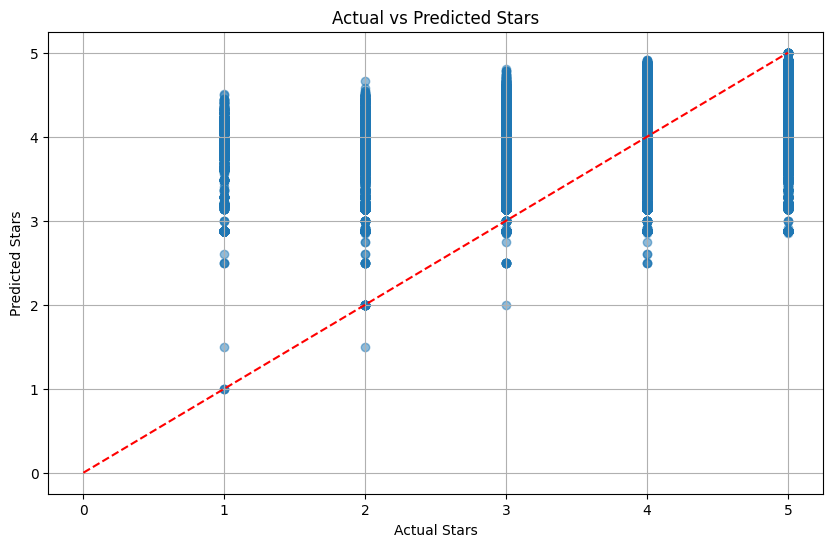

In [1]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

# Inicializar el cliente de BigQuery
client = bigquery.Client()

# Consulta para obtener los datos de la tabla de predicciones
query = """
SELECT
  category,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions`
"""

# Ejecutar la consulta y cargar los datos en un DataFrame
data = client.query(query).to_dataframe()

# Filtrar los valores predichos entre 0 y 5
data = data[(data['predicted_stars'] >= 0) & (data['predicted_stars'] <= 5)]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(data['actual_stars'], data['predicted_stars'], alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--')  # Línea de referencia
plt.title('Actual vs Predicted Stars')
plt.xlabel('Actual Stars')
plt.ylabel('Predicted Stars')
plt.grid(True)
plt.show()


REGRESION REGULARIZADA

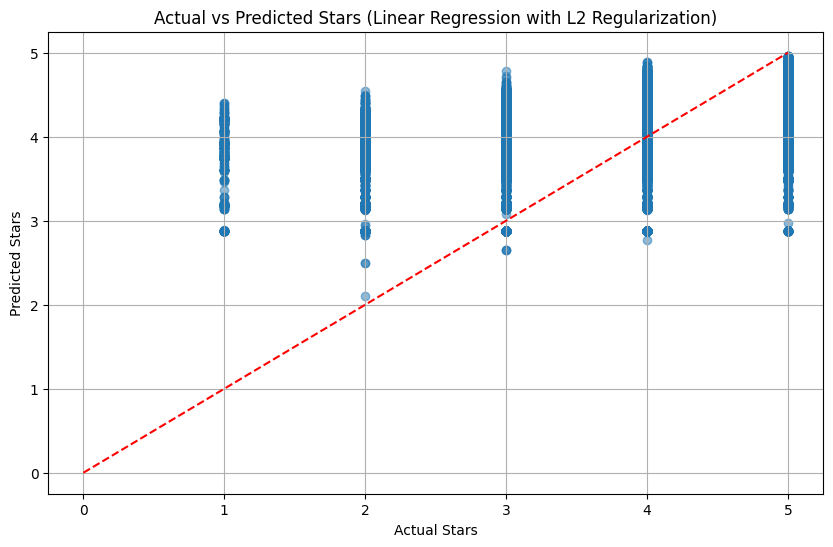

In [2]:
# Inicializar el cliente de BigQuery
client = bigquery.Client()

# Consulta para obtener los datos de la tabla de predicciones del modelo de regresión lineal regularizado
query_linear = """
SELECT
  category,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions_Linear`
"""

# Ejecutar la consulta y cargar los datos en un DataFrame
data_linear = client.query(query_linear).to_dataframe()

# Filtrar los valores predichos entre 0 y 5
data_linear = data_linear[(data_linear['predicted_stars'] >= 0) & (data_linear['predicted_stars'] <= 5)]

# Crear la gráfica de dispersión para el modelo de regresión lineal regularizado
plt.figure(figsize=(10, 6))
plt.scatter(data_linear['actual_stars'], data_linear['predicted_stars'], alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--')  # Línea de referencia
plt.title('Actual vs Predicted Stars (Linear Regression with L2 Regularization)')
plt.xlabel('Actual Stars')
plt.ylabel('Predicted Stars')
plt.grid(True)
plt.show()

RandomForest

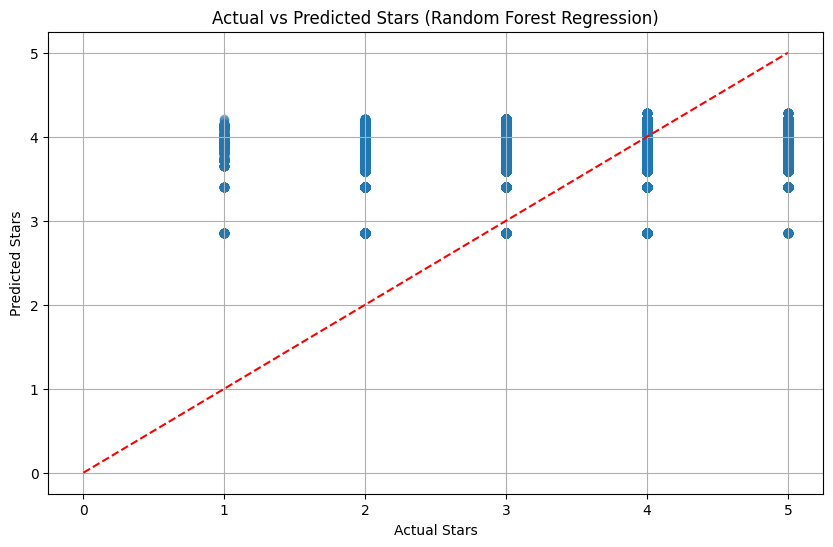

In [3]:
query_rf = """
SELECT
  category,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions_RandomForest`
"""

# Ejecutar la consulta y cargar los datos en un DataFrame
data_rf = client.query(query_rf).to_dataframe()

# Filtrar los valores predichos entre 0 y 5
data_rf = data_rf[(data_rf['predicted_stars'] >= 0) & (data_rf['predicted_stars'] <= 5)]

# Crear la gráfica de dispersión para el modelo Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(data_rf['actual_stars'], data_rf['predicted_stars'], alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--')  # Línea de referencia
plt.title('Actual vs Predicted Stars (Random Forest Regression)')
plt.xlabel('Actual Stars')
plt.ylabel('Predicted Stars')
plt.grid(True)
plt.show()

## **Curvas** ROC

Regresion Lineal

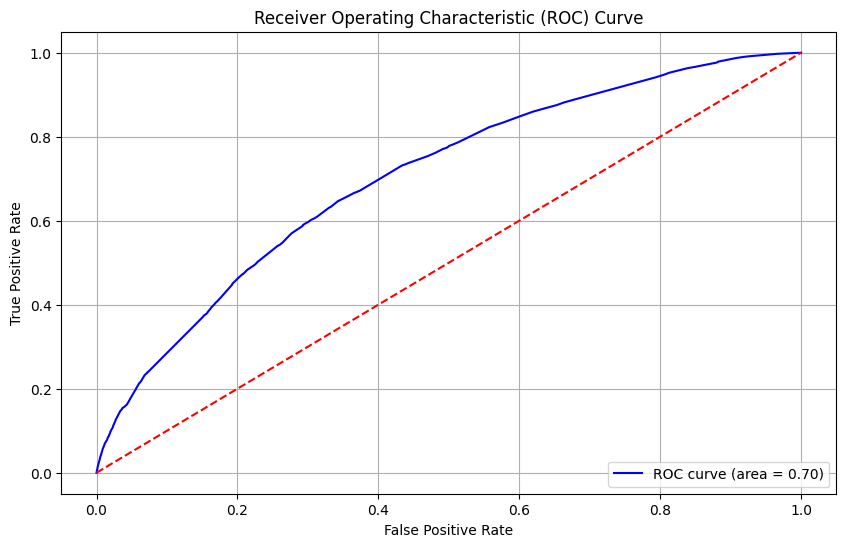

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Convertir el problema a clasificación binaria
threshold = 3.5
data['actual_binary'] = np.where(data['actual_stars'] > threshold, 1, 0)
data['predicted_binary'] = np.where(data['predicted_stars'] > threshold, 1, 0)

# Calcular el puntaje de predicción binaria
fpr, tpr, thresholds = roc_curve(data['actual_binary'], data['predicted_stars'])
roc_auc = roc_auc_score(data['actual_binary'], data['predicted_stars'])

# Crear la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


REGRESION REGULARIZADA

In [14]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

# Inicializar el cliente de BigQuery
client = bigquery.Client()

# Umbral para convertir el problema a clasificación binaria
threshold = 3.5

# Función para cargar datos y generar curva ROC
def plot_roc_curve(query, model_name):
    # Ejecutar la consulta y cargar los datos en un DataFrame
    data = client.query(query).to_dataframe()

    # Filtrar los valores predichos entre 0 y 5
    data = data[(data['predicted_stars'] >= 0) & (data['predicted_stars'] <= 5)]

    # Convertir el problema a clasificación binaria
    data['actual_binary'] = np.where(data['actual_stars'] > threshold, 1, 0)

    # Calcular el puntaje de predicción binaria
    fpr, tpr, thresholds = roc_curve(data['actual_binary'], data['predicted_stars'])
    roc_auc = roc_auc_score(data['actual_binary'], data['predicted_stars'])

    # Crear la curva ROC
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

REGRESION REGULARIZADA

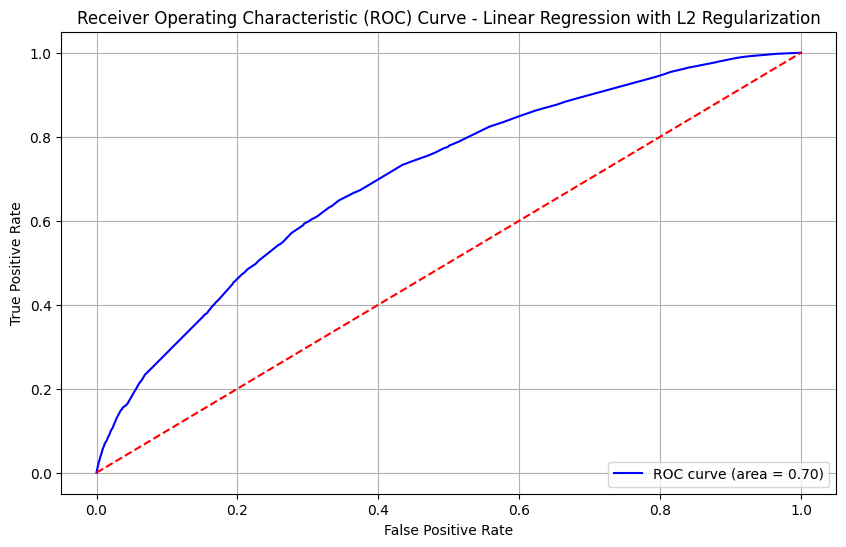

In [15]:
# Consulta para obtener los datos de la tabla de predicciones del modelo de regresión lineal regularizado
query_linear = """
SELECT
  category,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions_Linear`
"""
# Generar curva ROC para el modelo de regresión lineal regularizado
plot_roc_curve(query_linear, 'Linear Regression with L2 Regularization')

Random Forest

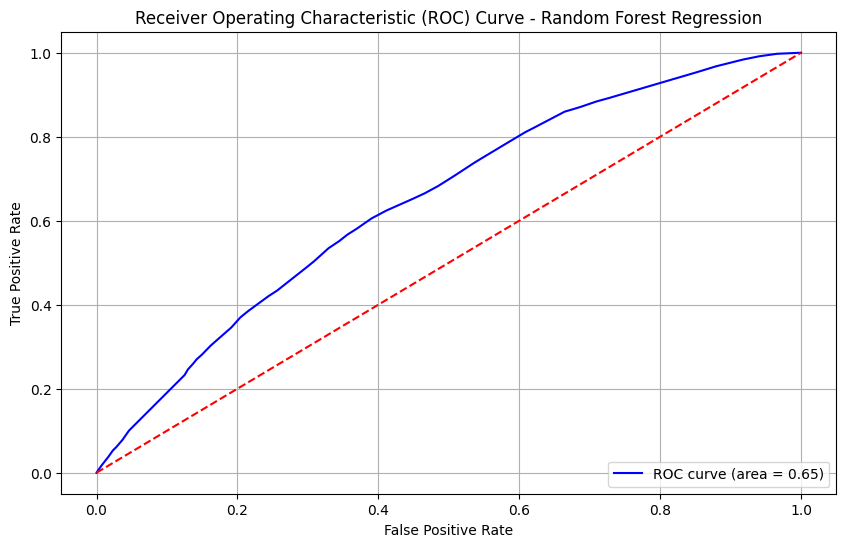

In [16]:
query_rf = """
SELECT
  category,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions_RandomForest`
"""

# Generar curva ROC para el modelo Random Forest
plot_roc_curve(query_rf, 'Random Forest Regression')

Regresion Lineal

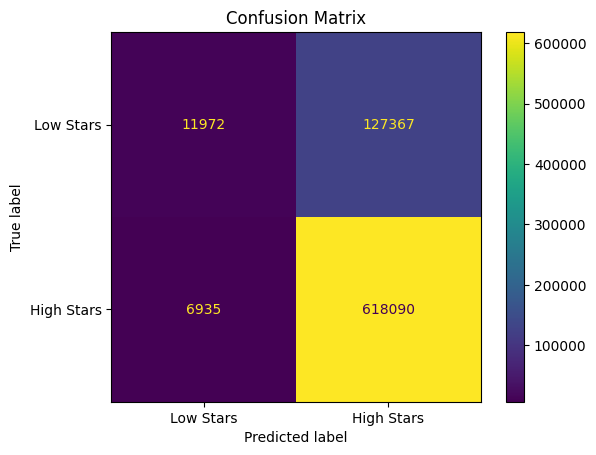

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(data['actual_binary'], data['predicted_binary'])
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low Stars', 'High Stars'])

# Mostrar la matriz de confusión
cmd.plot()
plt.title('Confusion Matrix')
plt.show()


In [8]:
from google.cloud import bigquery

# Inicializar el cliente de BigQuery
client = bigquery.Client()

# Consulta para predecir las estrellas para la categoría 'Mexican'
query = """
SELECT
  category,
  predicted_stars
FROM
  ML.PREDICT(MODEL `proyectofinal-426921.GoogleYelp.BusinessUnificados_Model`,
             (SELECT
                'Mexican' AS category))
"""

# Ejecutar la consulta y obtener el resultado
result = client.query(query).to_dataframe()

# Mostrar el resultado
print(result)


  category  predicted_stars
0  Mexican         3.764269


In [9]:
from google.cloud import bigquery

# Inicializar el cliente de BigQuery
client = bigquery.Client()

# Consulta para predecir las estrellas para múltiples categorías
query = """
SELECT
  category,
  predicted_stars
FROM
  ML.PREDICT(MODEL `proyectofinal-426921.GoogleYelp.BusinessUnificados_Model`,
             (SELECT 'Mexican' AS category
              UNION ALL
              SELECT 'Mediterranean'
              UNION ALL
              SELECT 'Japanese'
              UNION ALL
              SELECT 'American restaurant'
              UNION ALL
              SELECT 'Pizza'
                            UNION ALL
                            SELECT 'Burgers'
                                          UNION ALL
              SELECT 'Italian'
              UNION ALL
              SELECT 'German'
              UNION ALL
              SELECT 'French'
                            UNION ALL
              SELECT 'Irish'
              ))
"""

# Ejecutar la consulta y obtener el resultado
result = client.query(query).to_dataframe()

# Mostrar el resultado
print(result)


              category  predicted_stars
0              Mexican         3.764269
1        Mediterranean         4.187663
2             Japanese         3.958775
3  American restaurant         4.146378
4                Pizza         3.603165
5              Burgers         3.170149
6              Italian         3.756115
7               German         4.225000
8               French         4.160944
9                Irish         3.829268


# **SEGUNDO MODELO ESTRELLAS X UBICACION**

## **GRAFICAS DE DISPERSION** Segundo Modelo

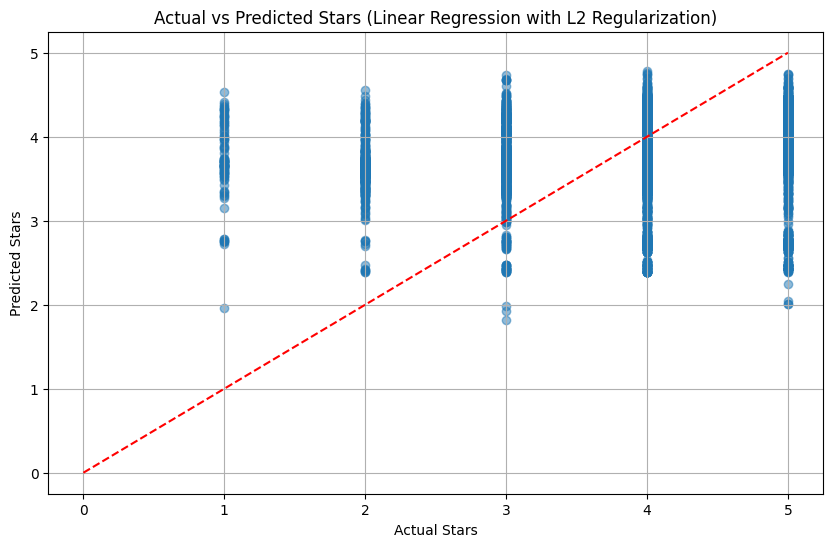

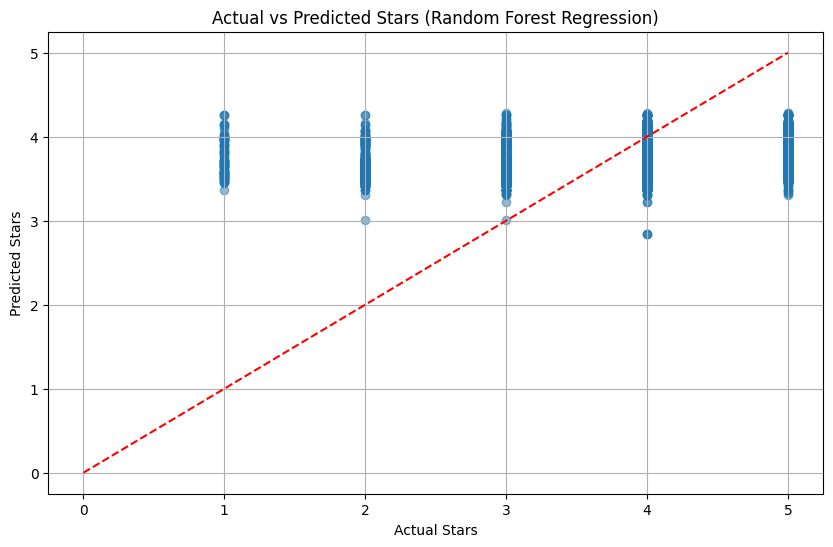

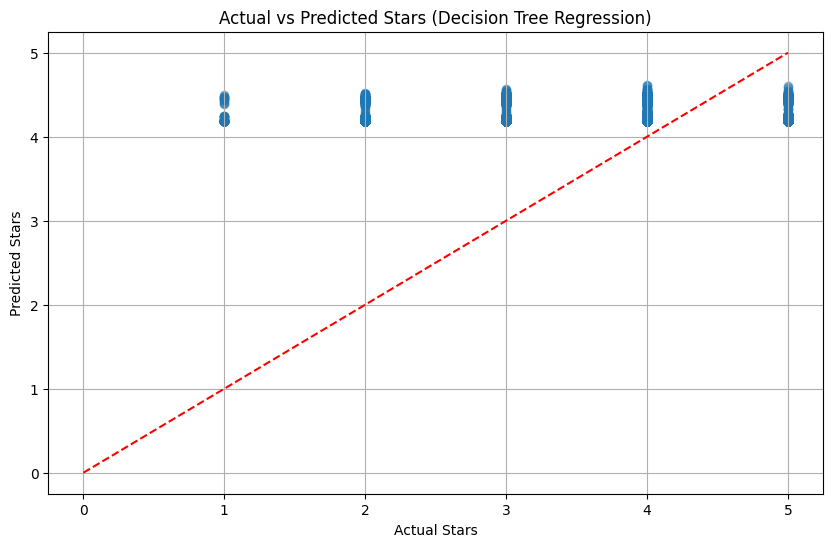

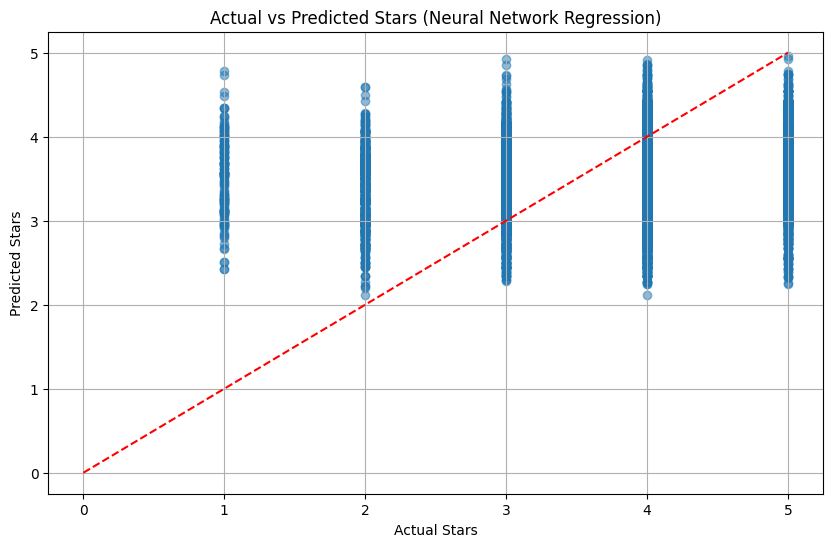

In [10]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

# Inicializar el cliente de BigQuery
client = bigquery.Client()

# Función para cargar datos y generar gráfica de dispersión
def plot_scatter(query, model_name):
    # Ejecutar la consulta y cargar los datos en un DataFrame
    data = client.query(query).to_dataframe()

    # Filtrar los valores predichos entre 0 y 5
    data = data[(data['predicted_stars'] >= 0) & (data['predicted_stars'] <= 5)]

    # Crear la gráfica de dispersión
    plt.figure(figsize=(10, 6))
    plt.scatter(data['actual_stars'], data['predicted_stars'], alpha=0.5)
    plt.plot([0, 5], [0, 5], 'r--')  # Línea de referencia
    plt.title(f'Actual vs Predicted Stars ({model_name})')
    plt.xlabel('Actual Stars')
    plt.ylabel('Predicted Stars')
    plt.grid(True)
    plt.show()

# Consulta para obtener los datos del modelo de Regresión Lineal Regularizado
query_linear = """
SELECT
  city,
  state,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions_Linear2`
"""

# Consulta para obtener los datos del modelo de Random Forest
query_random_forest = """
SELECT
  city,
  state,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions_RandomForest2`
"""

# Consulta para obtener los datos del modelo de Árboles de Decisión
query_decision_tree = """
SELECT
  city,
  state,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions_DecisionTree`
"""

# Consulta para obtener los datos del modelo de Red Neuronal
query_neural_network = """
SELECT
  city,
  state,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions_NeuralNetwork`
"""

# Generar gráficas de dispersión para cada modelo
plot_scatter(query_linear, 'Linear Regression with L2 Regularization')
plot_scatter(query_random_forest, 'Random Forest Regression')
plot_scatter(query_decision_tree, 'Decision Tree Regression')
plot_scatter(query_neural_network, 'Neural Network Regression')


**Curvas ROC segundo Modelo**

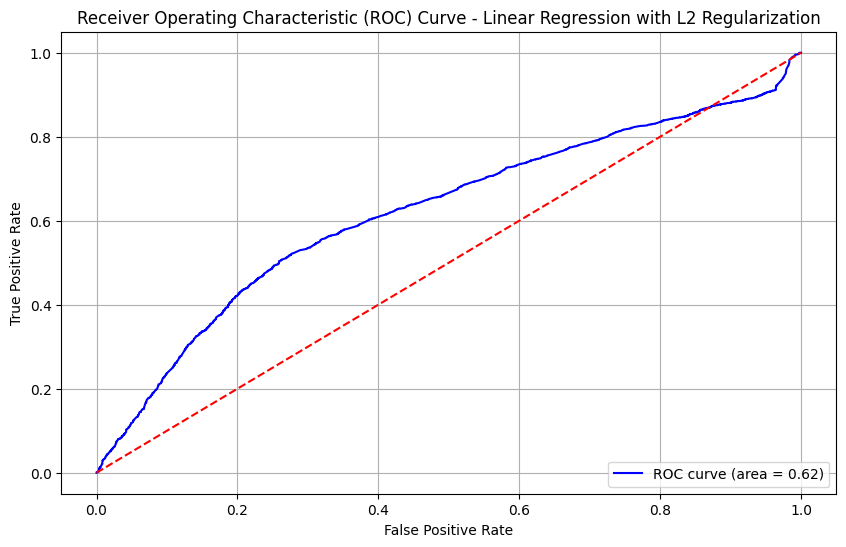

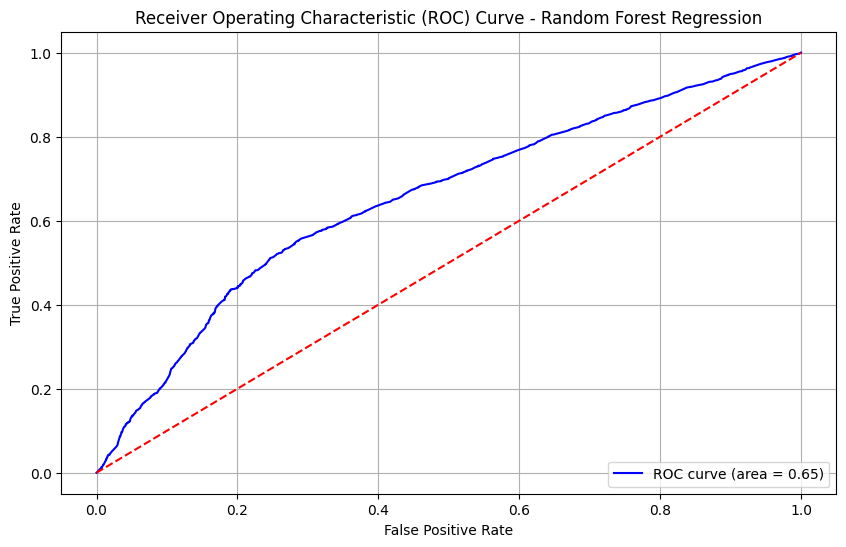

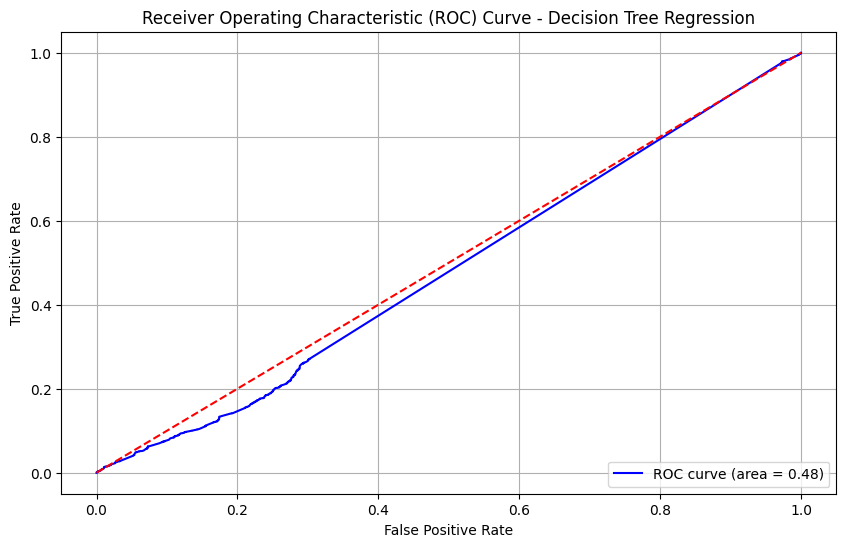

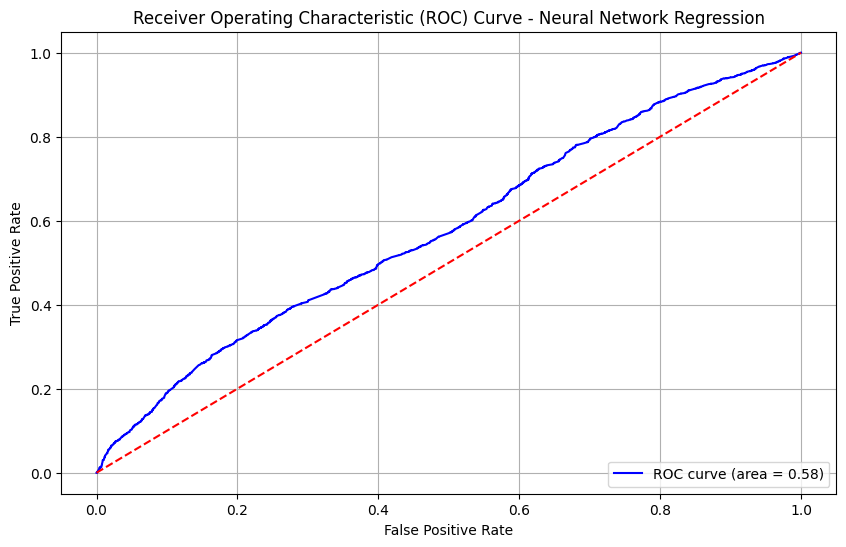

In [11]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

# Inicializar el cliente de BigQuery
client = bigquery.Client()

# Umbral para convertir el problema a clasificación binaria
threshold = 3.5

# Función para cargar datos y generar curva ROC
def plot_roc_curve(query, model_name):
    # Ejecutar la consulta y cargar los datos en un DataFrame
    data = client.query(query).to_dataframe()

    # Filtrar los valores predichos entre 0 y 5
    data = data[(data['predicted_stars'] >= 0) & (data['predicted_stars'] <= 5)]

    # Convertir el problema a clasificación binaria
    data['actual_binary'] = np.where(data['actual_stars'] > threshold, 1, 0)

    # Calcular el puntaje de predicción binaria
    fpr, tpr, thresholds = roc_curve(data['actual_binary'], data['predicted_stars'])
    roc_auc = roc_auc_score(data['actual_binary'], data['predicted_stars'])

    # Crear la curva ROC
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Consulta para obtener los datos del modelo de Regresión Lineal Regularizado
query_linear = """
SELECT
  city,
  state,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions_Linear2`
"""

# Consulta para obtener los datos del modelo de Random Forest
query_random_forest = """
SELECT
  city,
  state,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions_RandomForest2`
"""

# Consulta para obtener los datos del modelo de Árboles de Decisión
query_decision_tree = """
SELECT
  city,
  state,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions_DecisionTree`
"""

# Consulta para obtener los datos del modelo de Red Neuronal
query_neural_network = """
SELECT
  city,
  state,
  actual_stars,
  predicted_stars
FROM
  `proyectofinal-426921.GoogleYelp.BusinessUnificados_Predictions_NeuralNetwork`
"""

# Generar curvas ROC para cada modelo
plot_roc_curve(query_linear, 'Linear Regression with L2 Regularization')
plot_roc_curve(query_random_forest, 'Random Forest Regression')
plot_roc_curve(query_decision_tree, 'Decision Tree Regression')
plot_roc_curve(query_neural_network, 'Neural Network Regression')


In [13]:
from google.cloud import bigquery

# Inicializar el cliente de BigQuery
client = bigquery.Client()

# Consulta para predecir las estrellas para múltiples combinaciones de city, state
query = """
SELECT
  city,
  state,
  predicted_stars
FROM
  ML.PREDICT(MODEL `proyectofinal-426921.GoogleYelp.RandomForestRegresion2`,
             (SELECT 'Los Angeles' AS city, 'CA' AS state
              UNION ALL
              SELECT 'New York' AS city, 'NY' AS state
              UNION ALL
              SELECT 'Chicago' AS city, 'IL' AS state
              UNION ALL
              SELECT 'San Francisco' AS city, 'CA' AS state
              UNION ALL
              SELECT 'Houston' AS city, 'TX' AS state
              UNION ALL
              SELECT 'Miami' AS city, 'FL' AS state
              UNION ALL
              SELECT 'Boston' AS city, 'MA' AS state
              UNION ALL
              SELECT 'Cambridge' AS city, 'MA' AS state
              UNION ALL
              SELECT 'Worcester' AS city, 'MA' AS state
              UNION ALL
              SELECT 'Springfield' AS city, 'MA' AS state
              UNION ALL
              SELECT 'Lowell' AS city, 'MA' AS state
              UNION ALL
              SELECT 'Quincy' AS city, 'MA' AS state
              UNION ALL
              SELECT 'New Bedford' AS city, 'MA' AS state
              UNION ALL
              SELECT 'Fall River' AS city, 'MA' AS state
              UNION ALL
              SELECT 'Lynn' AS city, 'MA' AS state
              UNION ALL
              SELECT 'Newton' AS city, 'MA' AS state
              UNION ALL
              SELECT 'Somerville' AS city, 'MA' AS state
              UNION ALL
              SELECT 'Lawrence' AS city, 'MA' AS state
              UNION ALL
              SELECT 'Framingham' AS city, 'MA' AS state
              ))
"""

# Ejecutar la consulta y obtener el resultado
result = client.query(query).to_dataframe()

# Mostrar el resultado
print(result)



             city state  predicted_stars
0     Los Angeles    CA         3.947368
1        New York    NY         3.898191
2         Chicago    IL         3.867283
3   San Francisco    CA         4.061996
4         Houston    TX         4.073149
5           Miami    FL         3.705327
6          Boston    MA         3.919284
7       Cambridge    MA         3.966646
8       Worcester    MA         3.873359
9     Springfield    MA         3.905255
10         Lowell    MA         3.957104
11         Quincy    MA         3.909769
12    New Bedford    MA         3.825680
13     Fall River    MA         3.925281
14           Lynn    MA         3.957104
15         Newton    MA         3.967896
16     Somerville    MA         3.905255
17       Lawrence    MA         3.957104
18     Framingham    MA         3.883085
